# CLUBB Verification Test

## Component Being Tested
CLUBB clipping terms  

## Purpose
Create a test to verify the performance of CLUBB based on the clipping terms in CLUBB's prognostic variables 

## Description
As the first step to designing a verification test, we present an initial evaluation of CLUBB's clipping terms that may serve as a good candidate for constructing a test for pass/fail metrics. 

The CLUBB single column model simulations were ran for the BOMEX cloud regime at various time step sizes for 6 hours and the clipping term magnitudes for CLUBB's 13 prognostic variables were quantified. For example, in the equation describing the time tendency of $r_t$ variance, or rtp2, 
\begin{equation}\begin{split}
\\ \frac {\delta \overline{r_t^{\prime2}}} {\delta t} &= -\overline{w} \frac{\delta \overline{r_t^{\prime2}}}{\delta z} - \frac {1}{\rho_s} \frac {\delta \rho_s \overline{w^{\prime} r_t^{\prime2}}}{\delta z} - 2 \overline {w^{\prime}r_t^{\prime}} \frac{\delta \overline{r_t}}{\delta z} - \frac{C_2}{\tau} \Bigl( \overline{r_t^{\prime2}} - r_{t,tol}^{2} \Bigl ) \\ &\quad + \frac{\delta}{\delta z} \Bigr [ ( K_{w2} + \upsilon_2) \frac{\delta}{\delta z}  \overline{r_t^{\prime2}} \Bigr ]  + \overline{\frac {\delta {r_t^{\prime2}}} {\delta t} \Bigr |_{mc}} + \frac {\delta \overline{r_t^{\prime
2}}} {\delta t} \Bigr |_{pd} + \frac {\delta \overline{r_t^{\prime2}}} {\delta t} \Bigr |_{cl} 
\end{split}\end{equation}

the terms represented on the right hand side are, respectively, the mean advection, turbulent advection, turbulent production, dissipation term 1, dissipation term 2, microphysics, and the two clipping terms with subscripts $pd$ and $cl$. The clipping terms include subscripts cl, pd and mfl for explicit, non-conservative clipping, positive-definite conservative hole-filling scheme and monotonic flux limiter, respectively. 

A relative, unitless measure of the clipping terms was calculated that included normalizing their magnitudes with respect to the maximum physical term in each of CLUBB's prognostic budgets using root mean square (RMS) mass weighting and averaging over the first half (0-3hr) and second half (3-6hr) of the simulations. Therefore, the RMS-weighted, vertically-averaged, k to K, and time-averaged, i to I, clipping term, $F_{cl,rms}$, normalized by maximum physical term with RMS weighting was calculated as

\begin{equation}
F_{cl,rms} = \frac{ \sqrt{\sum_{i}^{I} \sum_{k}^{K} w_{k,i} (F_{k,i}^2)}} {F_{max,rms}}, 
\quad with \quad F_{max,rms} = max \Bigr (  \sum_{term_1}^{term_{all}} \sqrt{\sum_{i}^{I} \sum_{k}^{K} w_{k,i} (F_{term,k,i}^2)}  \, \, \Bigr ),
\end{equation} 
\begin{equation}
w_{k,i} = \frac{M_{k,i}}{\sum_{k=1}^{K} M_{k,i}}, \quad M_{k,i} = \Delta Z_{k,i} * \rho_{k,i},
\end{equation} 

where M = mass, $\Delta Z$ = thickness, $\rho$ = density. 

## Results of Initial Evaluation

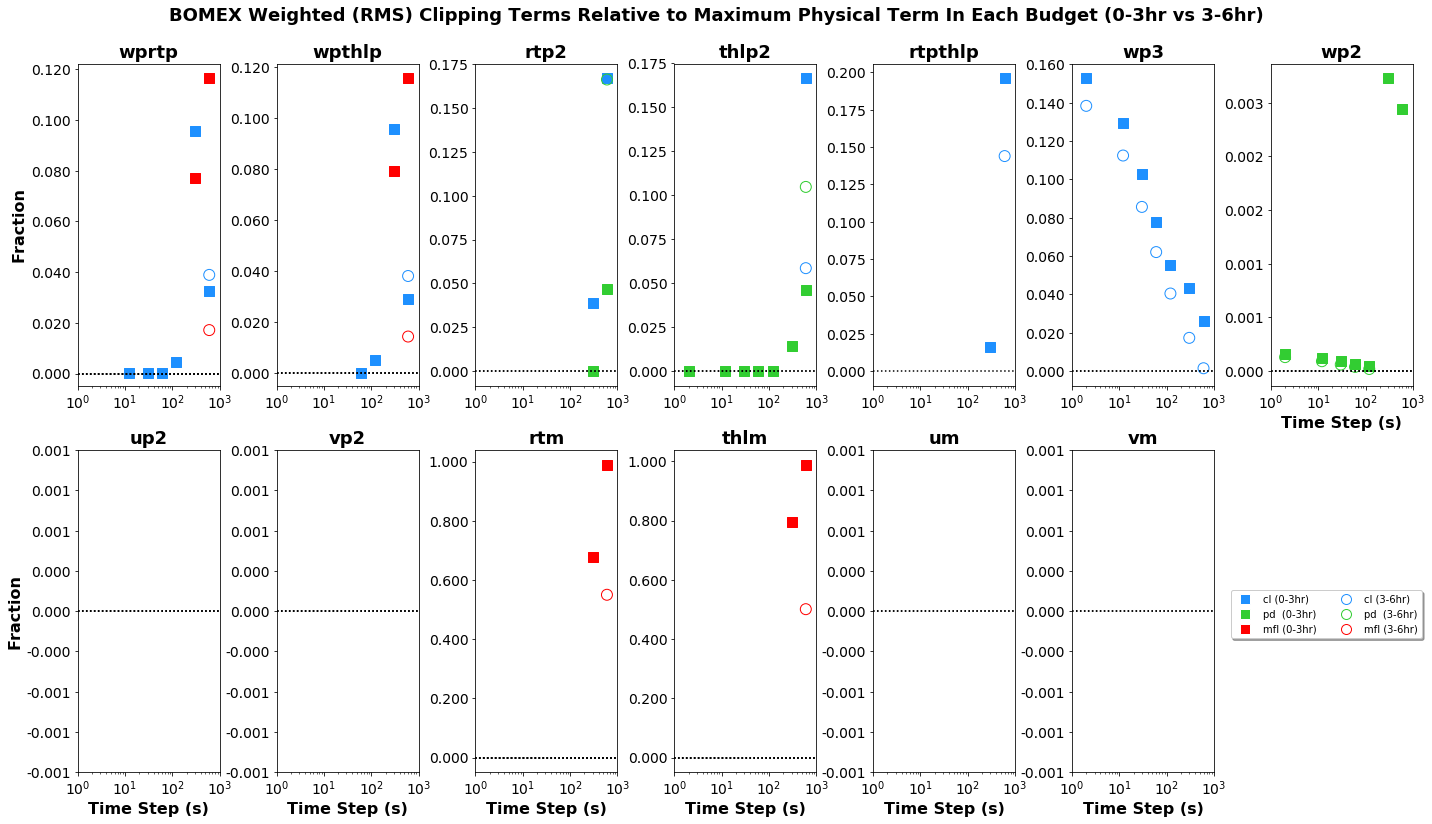

In [9]:
from IPython.display import display, Image
display(Image(filename='relative_clipping_rms_weighted_bomex.png'))

Figure 1: Vertically-weighted using root mean square (RMS) method, time-averaged clipping term magnitudes relative to the maximum physical term in each budget for each time step size expressed as a unitless fraction. Square markers represent the 0-3 hr time average, circle markers represent the 3-6 hr time average. The explicit clipping term is in blue, positive definite term is in green, and monotonic flux limiter term is in red. The black dotted line represents a zero reference. Values less than 10−6 were considered insignificant and not plotted.

## Discussion
The clipping term magnitudes relative to the maximum term in each budget provide a unitless measure of the significance of the clipping terms that can be used to construct a verification pass/fail test. While this serves as an evaluation of the clipping terms so far, the document will be updated as we continue to work on creating the CLUBB verification test. 